In [26]:
from headers import *
from DMP_Segment import *
from scipy.signal import argrelextrema
%matplotlib notebook

In [3]:
# FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Trajectories/"
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

In [5]:
lhgt = npy.load(os.path.join(FILE_DIR.format(1),"LH_Seg.npy"))
rhgt = npy.load(os.path.join(FILE_DIR.format(1),"RH_Seg.npy"))

# lhgt[-1] -= 3
# rhgt[-1] -= 3

lhgt,rhgt

(array([  0,  21,  37,  62,  85, 168, 182, 211, 235]),
 array([  0,  94, 110, 136, 156, 235]))

In [6]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/Compiled_Data"
lh = npy.load(os.path.join(FILE_DIR.format(1),"LHC.npy"))[0]
rh = npy.load(os.path.join(FILE_DIR.format(1),"RHC.npy"))[0]

In [7]:
len(lh)

236

In [9]:
rolltime = 236
nk = 100
dmp = [DMP(rolltime,nk) for i in range(2)]

dmp[0].linear_interpolate(lh)
dmp[1].linear_interpolate(rh)

# dmp[0].load_trajectory(lhpos,lhvel,lhacc)
# dmp[1].load_trajectory(rhpos,rhvel,rhacc)

for i in range(2):
    dmp[i].initialize_variables()
    dmp[i].learn_DMP()

dmp[0].rollout(lh[0],lh[-1],dmp[0].demo_vel[0])
dmp[1].rollout(rh[0],rh[-1],dmp[1].demo_vel[0])

In [42]:
npy.linalg.norm(dmp[0].vel_roll,axis=1)

array([  5.15147395e-03,   3.77853890e-03,   2.68964607e-03,
         1.86594053e-03,   1.28626424e-03,   9.20741920e-04,
         7.17177553e-04,   6.01625727e-04,   5.10875751e-04,
         4.13687569e-04,   3.03162274e-04,   1.93296767e-04,
         1.79149716e-04,   3.55053215e-04,   6.55142597e-04,
         1.08171957e-03,   1.66701447e-03,   2.44405889e-03,
         3.43291270e-03,   4.62810883e-03,   5.98821105e-03,
         7.43100020e-03,   8.83771291e-03,   1.00678680e-02,
         1.09829272e-02,   1.14735037e-02,   1.14826045e-02,
         1.10177061e-02,   1.01476916e-02,   8.98576749e-03,
         7.66433210e-03,   6.31044537e-03,   5.03051786e-03,
         3.91119831e-03,   3.04109584e-03,   2.54181217e-03,
         2.52445041e-03,   2.93985676e-03,   3.62044792e-03,
         4.43611559e-03,   5.31201949e-03,   6.19790227e-03,
         7.05046622e-03,   7.82795135e-03,   8.49061730e-03,
         9.00371656e-03,   9.34117049e-03,   9.48880872e-03,
         9.44632886e-03,

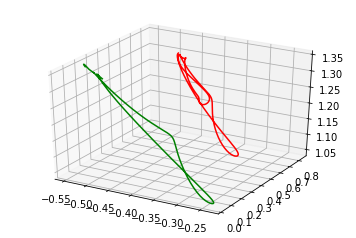

In [11]:
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
t1 = 0
t2 = 10
ax1.plot(dmp[0].pos_roll[:,0],dmp[0].pos_roll[:,1],dmp[0].pos_roll[:,2],'r')
# ax1.plot(dmp[0].pos_roll[t1:t2,0],dmp[0].pos_roll[t1:t2,1],dmp[0].pos_roll[t1:t2,2],'b')
ax1.plot(dmp[1].pos_roll[:,0],dmp[1].pos_roll[:,1],dmp[1].pos_roll[:,2],'g')
# ax1.plot(dmp[1].pos_roll[t1:t2,0],dmp[1].pos_roll[t1:t2,1],dmp[1].pos_roll[t1:t2,2],'b')

# ax1.scatter(dmp[0].pos_roll[:,0],dmp[0].pos_roll[:,1],dmp[0].pos_roll[:,2],'r')
# ax1.scatter(dmp[1].pos_roll[:,0],dmp[1].pos_roll[:,1],dmp[1].pos_roll[:,2],'g')

ax1.scatter(dmp[0].pos_roll[dmp[0].segmentation_indices,0],dmp[0].pos_roll[dmp[0].segmentation_indices,1],dmp[0].pos_roll[dmp[0].segmentation_indices,2],'r')
ax1.scatter(dmp[1].pos_roll[dmp[1].segmentation_indices,0],dmp[1].pos_roll[dmp[1].segmentation_indices,1],dmp[1].pos_roll[dmp[1].segmentation_indices,2],'g')
plt.show()

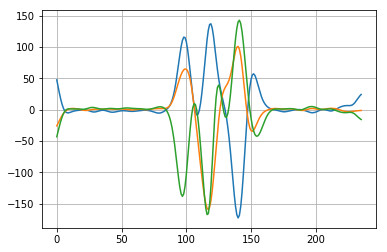

In [14]:
tr = range(236)
fig2,ax2=plt.subplots()
ax2.plot(tr,dmp[1].force_roll)
ax2.grid()
plt.show()

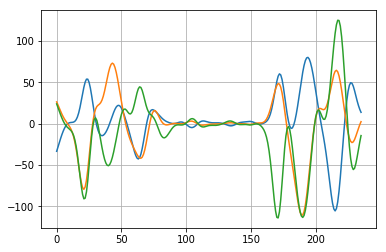

In [15]:
fig3,ax3 = plt.subplots()
ax3.plot(tr,dmp[0].force_roll)
ax3.grid()
plt.show()

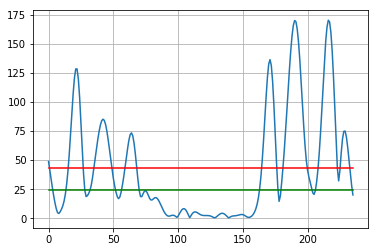

(array([ 21,  42,  64, 171, 190, 216, 229]),)

In [16]:
fig4, ax4 = plt.subplots()
lhf_norm = npy.linalg.norm(dmp[0].force_roll,axis=1)
rhf_norm = npy.linalg.norm(dmp[1].force_roll,axis=1)
ax4.plot(tr,lhf_norm)
ax4.plot(tr,npy.median(lhf_norm)*npy.ones(dmp[0].rollout_time),'g')
ax4.plot(tr,npy.mean(lhf_norm)*npy.ones(dmp[0].rollout_time),'r')
ax4.grid()
plt.show()

argrelextrema(lhf_norm*(lhf_norm>lhf_norm.mean()),npy.greater,order=7)

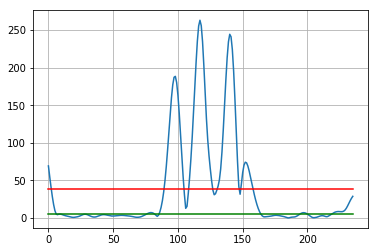

(array([ 98, 117, 140]),)

In [17]:
fig4, ax4 = plt.subplots()
ax4.plot(tr,rhf_norm)
ax4.plot(tr,npy.median(rhf_norm)*npy.ones(dmp[1].rollout_time),'g')
ax4.plot(tr,npy.mean(rhf_norm)*npy.ones(dmp[1].rollout_time),'r')
ax4.grid()
plt.show()

argrelextrema(rhf_norm*(rhf_norm>rhf_norm.mean()),npy.greater,order=7)

<IPython.core.display.Javascript object>


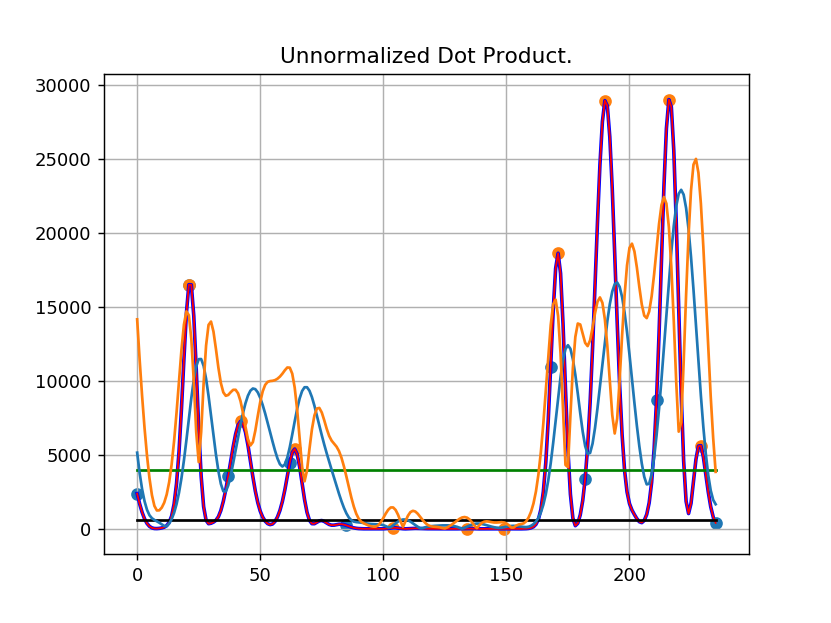

(3409.1775431957108,
 (array([ 21,  42,  64, 104, 134, 149, 171, 190, 216, 229]),))

In [48]:
unnorm_dot = npy.zeros(dmp[0].rollout_time-1)
for i in range(dmp[0].rollout_time-1):
#     unnorm_dot[i] = npy.dot(dmp[0].force_roll[i],dmp[0].force_roll[i+1])
    unnorm_dot[i] = npy.dot(dmp[0].force_roll[i],dmp[0].force_roll[i])
    
rhunnorm_dot = npy.zeros(dmp[1].rollout_time-1)
for i in range(dmp[1].rollout_time-1):
    rhunnorm_dot[i] = npy.dot(dmp[1].force_roll[i],dmp[1].force_roll[i+1])

fig,ax = plt.subplots()
ax.plot(range(dmp[0].rollout_time-1),unnorm_dot,'b',linewidth=2)
ax.plot(tr,npy.linalg.norm(dmp[0].force_roll,axis=1)**2,'r',linewidth=1)

ax.plot(tr,npy.ones(dmp[0].rollout_time)*npy.median(unnorm_dot),'k')
ax.plot(tr,npy.ones(dmp[0].rollout_time)*npy.mean(unnorm_dot),'g')
ax.plot(tr,1000000*npy.linalg.norm(dmp[0].vel_roll,axis=1))
ax.plot(tr,10000000*npy.linalg.norm(dmp[0].acc_roll,axis=1))

ax.scatter(lhgt,lhf_norm[lhgt]**2)
ax.scatter(lhpred,lhf_norm[lhpred]**2)

ax.set_title("Unnormalized Dot Product.")
ax.grid()
plt.show()

npy.std(unnorm_dot)/2, lhpred

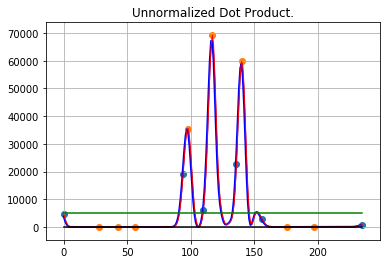

(6769.5665549741334, (array([ 28,  43,  56,  98, 117, 140, 176, 197]),))

In [23]:
fig,ax = plt.subplots()
ax.plot(range(dmp[1].rollout_time-1),rhunnorm_dot,'b',linewidth=2)
ax.plot(tr,npy.linalg.norm(dmp[1].force_roll,axis=1)**2,'r',linewidth=1)

ax.plot(tr,npy.ones(dmp[1].rollout_time)*5000,'g')
# ax.plot(tr,npy.ones(dmp[1].rollout_time)*rhunnorm_dot.mean(),'k')
ax.plot(tr,npy.ones(dmp[1].rollout_time)*npy.median(rhunnorm_dot),'k')
# ax.plot(range(dmp[1].rollout_time-1),rhunnorm_dot)
# ind = npy.array([63,67])
ax.scatter(rhgt,rhf_norm[rhgt]**2)
ax.scatter(rhpred,rhf_norm[rhpred]**2)

ax.set_title("Unnormalized Dot Product.")
ax.grid()
plt.show()

npy.std(rhunnorm_dot)/2, rhpred

In [24]:
# from scipy.ndimage.filters import maximum_filter1d as mxf
# window = 10
# mxf_dot = mxf(unnorm_dot,window)

# fig11,ax11 = plt.subplots()
# ax11.plot(range(dmp[0].rollout_time-1),mxf_dot)
# ax11.set_title("Unnormalized Dot Product.")
# ax11.grid()
# plt.show()

window = 7
from scipy.signal import argrelextrema
# lhpred = argrelextrema(unnorm_dot,npy.greater,order=window)
# rhpred = argrelextrema(rhunnorm_dot,npy.greater,order=window)
lhf_norm = npy.linalg.norm(dmp[0].force_roll,axis=1)
rhf_norm = npy.linalg.norm(dmp[1].force_roll,axis=1)

lhpred = argrelextrema(lhf_norm,npy.greater,order=window)
rhpred = argrelextrema(rhf_norm,npy.greater,order=window)
lhpred,rhpred

((array([ 21,  42,  64, 104, 134, 149, 171, 190, 216, 229]),),
 (array([ 28,  43,  56,  98, 117, 140, 176, 197]),))

In [25]:
lhgt,rhgt

(array([  0,  21,  37,  62,  85, 168, 182, 211, 235]),
 array([  0,  94, 110, 136, 156, 235]))

<IPython.core.display.Javascript object>


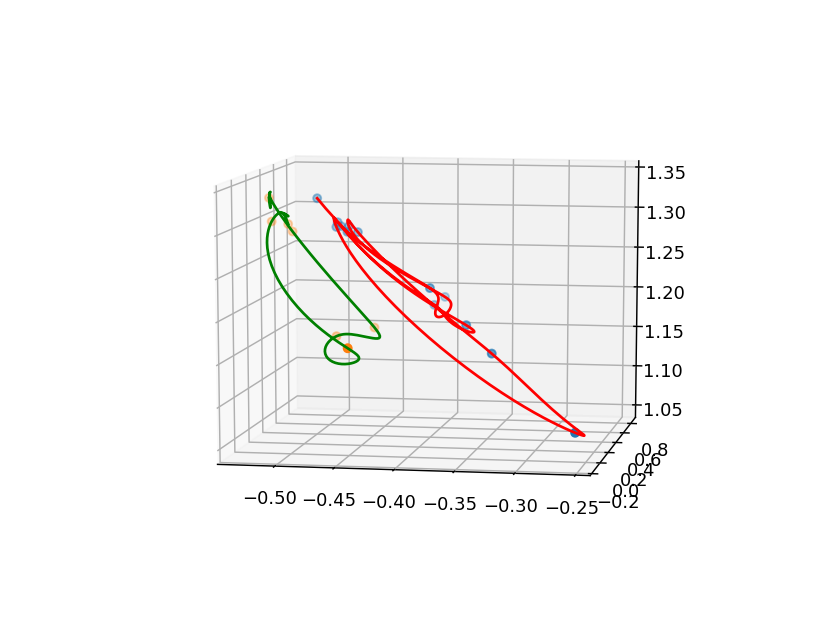

In [99]:
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp[0].pos_roll[:,0],dmp[0].pos_roll[:,1],dmp[0].pos_roll[:,2],'r')
ax1.plot(dmp[1].pos_roll[:,0],dmp[1].pos_roll[:,1],dmp[1].pos_roll[:,2],'g')

# ax1.scatter(dmp[0].pos_roll[lhpred,0],dmp[0].pos_roll[lhpred,1],dmp[0].pos_roll[lhpred,2],'r')
# ax1.scatter(dmp[1].pos_roll[rhpred,0],dmp[1].pos_roll[rhpred,1],dmp[1].pos_roll[rhpred,2],'g')

ax1.scatter(dmp[0].pos_roll[lhgt,0],dmp[0].pos_roll[lhgt,1],dmp[0].pos_roll[lhgt,2],'r')
ax1.scatter(dmp[1].pos_roll[rhgt,0],dmp[1].pos_roll[rhgt,1],dmp[1].pos_roll[rhgt,2],'g')

plt.show()

<IPython.core.display.Javascript object>


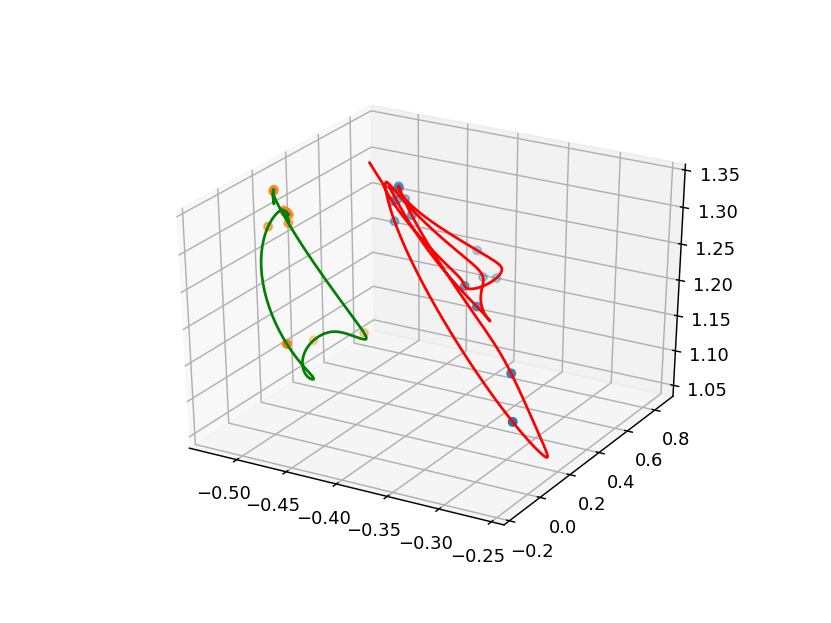

In [88]:
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot(dmp[0].pos_roll[:,0],dmp[0].pos_roll[:,1],dmp[0].pos_roll[:,2],'r')
ax1.plot(dmp[1].pos_roll[:,0],dmp[1].pos_roll[:,1],dmp[1].pos_roll[:,2],'g')

ax1.scatter(dmp[0].pos_roll[lhpred,0],dmp[0].pos_roll[lhpred,1],dmp[0].pos_roll[lhpred,2],'r')
ax1.scatter(dmp[1].pos_roll[rhpred,0],dmp[1].pos_roll[rhpred,1],dmp[1].pos_roll[rhpred,2],'g')

# ax1.scatter(dmp[0].pos_roll[lhgt,0],dmp[0].pos_roll[lhgt,1],dmp[0].pos_roll[lhgt,2],'r')
# ax1.scatter(dmp[1].pos_roll[rhgt,0],dmp[1].pos_roll[rhgt,1],dmp[1].pos_roll[rhgt,2],'g')

plt.show()

In [27]:
rhpred, rhf_norm[rhpred], rhf_norm.mean()

((array([ 42,  65,  93, 108, 132, 163, 180, 211, 233, 245, 261, 295, 307]),),
 array([   4.54528035,    2.70089114,  198.38332121,   88.699386  ,
         249.64590904,  247.56599998,   94.14800403,    8.27849359,
           3.82293341,    3.3429106 ,    3.5510875 ,    4.74278486,
           2.9160208 ]),
 42.675871040943399)

In [42]:
# rhpred = rhpred[0]
# lhpred = lhpred[0]

In [46]:
mask_rhpred = []

rh_greater = rhf_norm[rhpred]>rhf_norm.mean()

for i in range(1,len(rhpred)-1):
    if rh_greater[i]:
        mask_rhpred.append(rhpred[i])
    if not(rh_greater[i]):
        print("Reached:",i)
        if (rh_greater[i-1])^(rh_greater[i+1]):
            mask_rhpred.append(rhpred[i])                   
mask_rhpred

('Reached:', 1)
('Reached:', 7)
('Reached:', 8)
('Reached:', 9)
('Reached:', 10)
('Reached:', 11)


[65, 93, 108, 132, 163, 180, 211]

In [63]:
dmp[0].number_kernels

100